# Before entering the project space, lets break down the SVC algorithm:

## 0. PRELIMINARIES :

In [273]:
import seaborn as sns; sns.set()
   #THIS GIVES GRAPHS THE SEABORN STYLING, VERY ELEGANT-LOKING RESULTS
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1. GENERATE THE DATA:    

<b> 
> 
Being able to pull out a dataset at any time and explore techniques is extremely helpful. This can be done from loading an external source, or synthesizing a controllable dataset with python. Synthetic data is a phenomenal resource for probing each algorithm, though it may not simulate the messiness of a real dataset (which is why practicing both is important).
> 
The following function is available to craft a dataset suitable for exploring classification. The sklearn.datasets.samples_generator has a lot of great stuff.

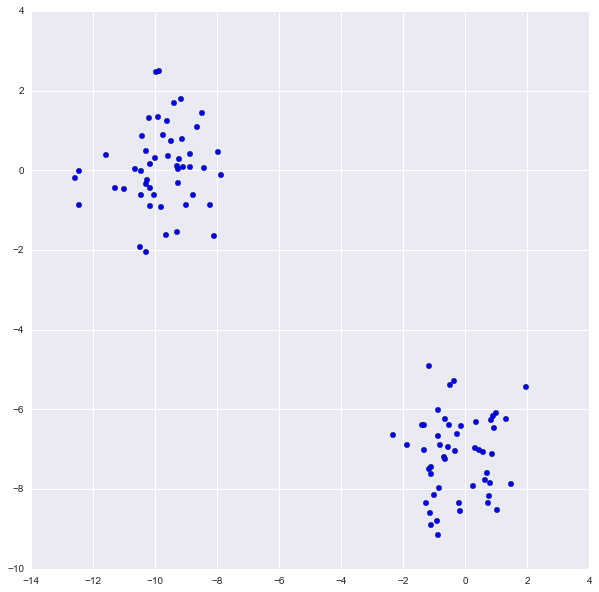

In [39]:
#MAKE BLOBS
from sklearn.datasets.samples_generator import make_blobs
x_var, y_var = make_blobs(n_samples = 100, centers=2, 
                  cluster_std = 1,random_state=9)

#SAVE THE DATA - THIS IS A BEST PRACTICE SO THAT THIS ANALYSIS CAN BE REPLICATED LATER
np.save('A0_DATA',x_var)
np.save('A0_DATA_CLASSES',y_var)

#SHOW THE DATA
plt.scatter(x_var[:,0],x_var[:,1],s=30)
plt.show()

---

### RE-LOAD THE SAVED DATASET:

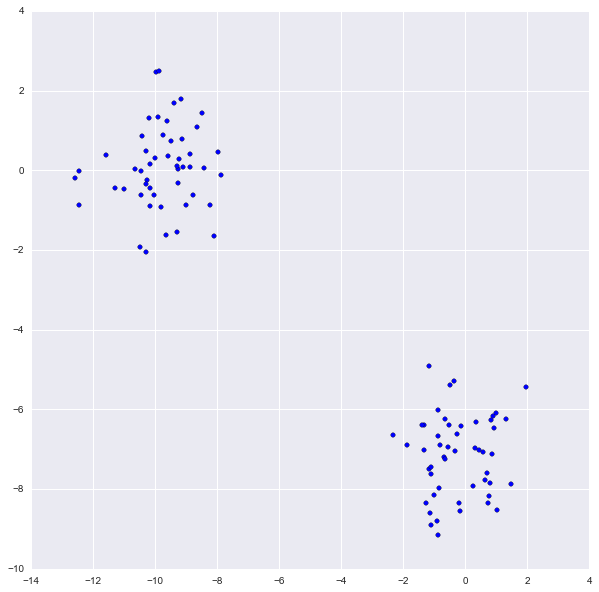

In [50]:
#LOAD DATA
x_var = np.load('A0_DATA.npy')
y_var = np.load('A0_DATA_CLASSES.npy')

#SPLIT X_VAR INTO X & Y COLUMNS
x_val = x_var[:,0]
y_val = x_var[:,1] 

#SHOW DATA
plt.scatter(x_val,y_val)
plt.show()

---

### RE-SCALE THE DATASET

#### There are many benefits to having the data rescaled to a mean-value of 0 and a variance of 1 (unit variance)
><b>*Preprocessing is explored in more depth in the A2 section of the project

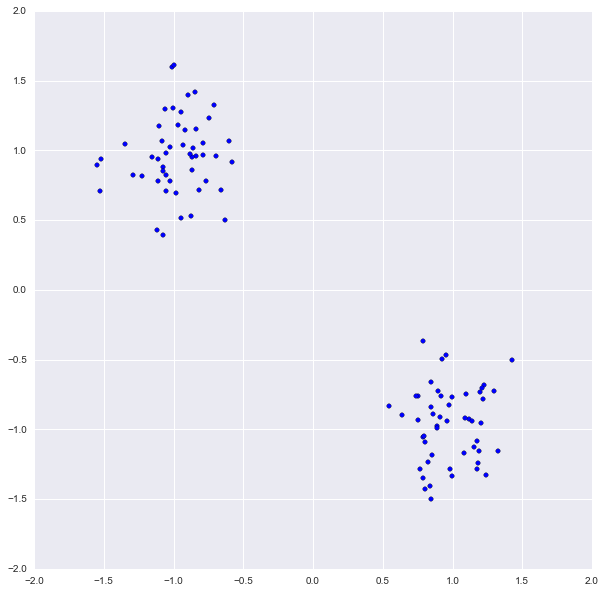

In [53]:
#RESCALE
from sklearn.preprocessing import scale
x_var = scale(x_var)

#SPLIT X_VAR INTO X AND Y COLUMNS
x_val = x_var[:,0]
y_val = x_var[:,1] 

#SHOW RESCALED DATA
plt.scatter(x_val,y_val)
plt.show()

## 3. FITTING A MODEL TO THE RE-SCALED DATA WITH SKLEARN:

#### The sklearn interface makes it superbly easy to implementin SVMs with two lines of code:

In [116]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(x_var,y_var)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### The model this algorithm generates will form the foundation for the following exploration.   

---

## 4. THE ALGORITHM: SUPPORT VECTOR MACHINE BASICS

><b>
The Support Vector Machines algorithm can classify a dataset as belonging to a specific grouping of data points. In the above dataset, there are two clusters (groups) of data. Here the algorithm should be able to identify the groups, and predict which group additional data points would belong to given their x and y coordinates. 
</b>

><b>The general flow of the algorithm is:   

>><b>
4A. Identify each classification category.   
4B. Identify the points of each grouping that are closest to the other grouping.  
4C. Based on these closest points, create a decision boundary that will be used to classify additional data.   
4D. The Support Vector Classifier model will assign new data points based on which zone they fall into. 

>## 4A. IDENTIFY THE CLASS CATEGORIES: 
>><b>The classification for the algorithm is pulled in alongside the data. Below the groups are represented by different colors. 

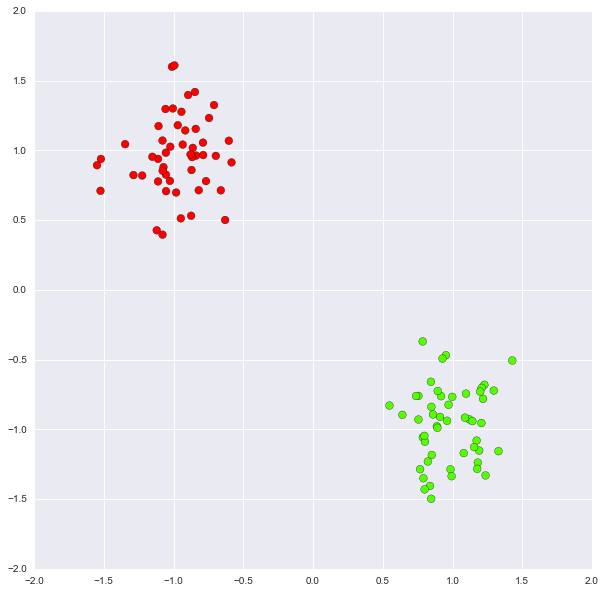

In [57]:
plt.rcParams['figure.figsize']=(10,10)
line = np.linspace(-4, 4)
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)
plt.show()

>>### A hyperplane is an object that has one less dimension than the dataset. It dissects the dimensional space

>>### Support vector machines seek to divide the given data points into groups using a hyper plane. In a 2D dataset, this would be a line.

>>### If a new data point would fall on one side of the boundary line, it would belong to the data group that resides on the same side of the boundary line. 

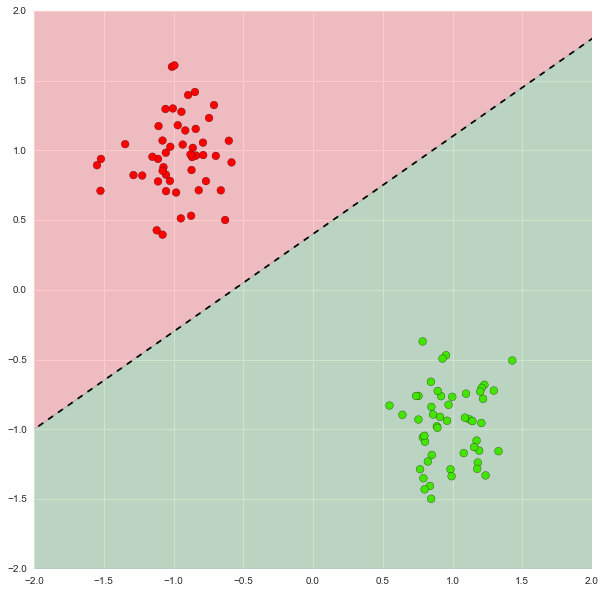

In [275]:
line = np.linspace(-3, 3)
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#AN ARBITRARY BOUNDARY LINE
x_space_0 = np.linspace(-3,3)
y_line_0_1 = [((.7*x)+.4)  for x in x_space_0]
plt.plot(x_space_0,y_line_0_1,color='k',ls='dashed')

#FILL GROUP ZONES
plt.fill_between(x_space, y_line_0_1, [2 for x in x_space],facecolor = 'Red',alpha = .2)
plt.fill_between(x_space, y_line_0_1, [-2 for x in x_space],facecolor = 'Green',alpha = .2)

#STYLING
plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.show()

>>### It is possible to draw many different boundary lines that would divide the two classes of data…

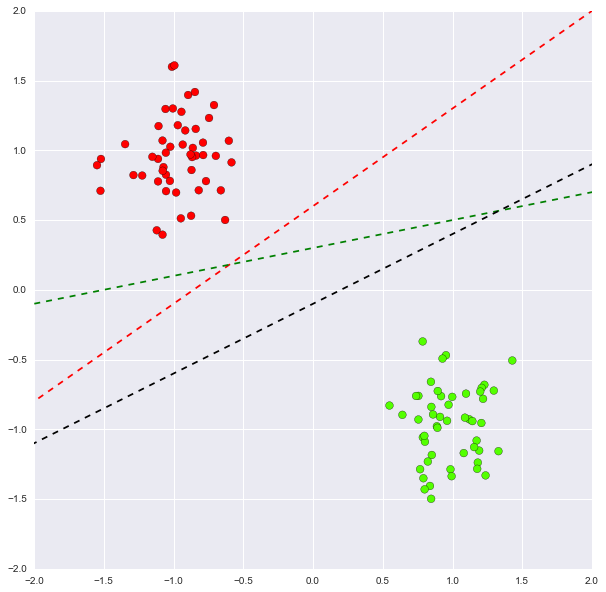

In [208]:
plt.rcParams['figure.figsize']=(10,10)
line = np.linspace(-4, 4)
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)


x_space_0 = np.linspace(-3,3)
y_line_0_1 = [((.7*x)+.6)  for x in x_space_0]
y_line_0_2 = [((.2*x)+.3)  for x in x_space_0]
y_line_0_3 = [((.5*x)-.1)  for x in x_space_0]

plt.plot(x_space_0,y_line_0_1,color='r',ls='dashed')
plt.plot(x_space_0,y_line_0_2,color='g',ls='dashed')
plt.plot(x_space_0,y_line_0_3,color='k',ls='dashed')

plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.show()

>>### The 'padding' around a boundary line is called it's margin:

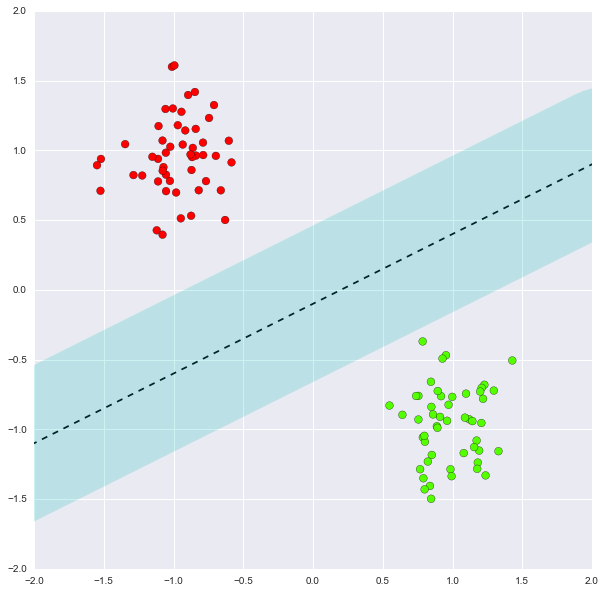

In [221]:
plt.rcParams['figure.figsize']=(10,10)
line = np.linspace(-4, 4)
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)


x_space_0 = np.linspace(-3,3)
y_line_0_3 = [((.5*x)-.1)  for x in x_space_0]

plt.plot(x_space_0,y_line_0_3,color='k',ls='dashed')
plt.plot(x_space_0,y_line_0_3,color='c',linewidth=140,alpha=.2)

plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.show()

>### 4B. The SVC algorithm uses a specific strategy to determine where to place the decision boundary by maximizing the margin. 
### First, the algorithm looks at the the closest points of one cluster to the other. These points are called support vectors. Depending on the data set, there can be anywhere from two to multiples.

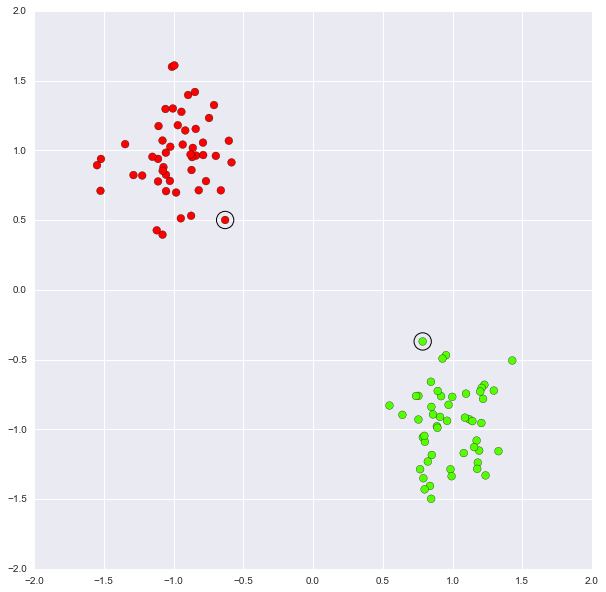

In [172]:
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

# plot support vectors helper function
def plot_support_vectors():
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth=1, facecolors='none');

plt.rcParams['figure.figsize'] = (10,10)
plot_support_vectors()
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.show()

>### <b> 4C. The boundary line is then placed in such a way as to maximize the distance between the margin as it touches the support vectors. This is called Maximizing the Margin.

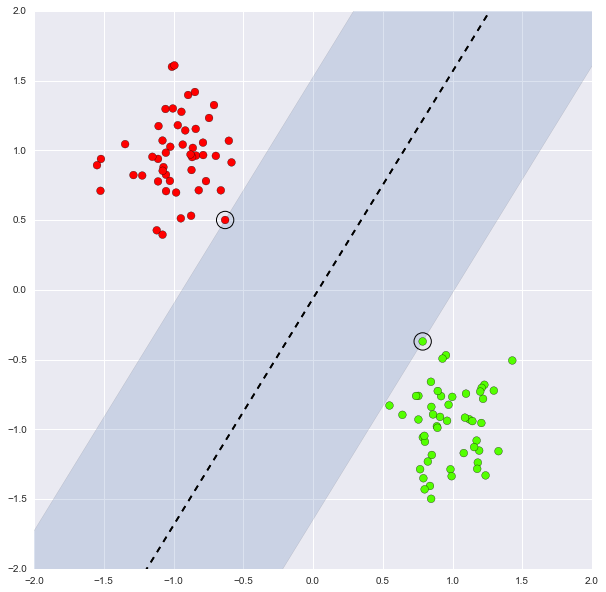

In [264]:
#BOUNDARY LINE
coef = model.coef_[0]
slope = -coef[0] / coef[1]
x_line = np.linspace(-3, 3)
y_line = slope * x_line - (model.intercept_[0]) / coef[1]
plt.plot(x_line, y_line, c='k',ls='dashed')

#MARGIN:
plt.fill_between(x_line,
                 [((slope*x) + top_intercept) for x in x_line],
                 [((slope*x) + bottom__intercept) for x in x_line],
                 alpha = .2)


#DATA
plot_boundary_line()
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#SUPPORT VECTORS
plot_support_vectors()

#STYLING
plt.rcParams['figure.figsize'] = (10,10)
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.show()

>### <b> 4D. Finally, the Support Vector Classifier model will assign new data points based on which zone they fall into. 

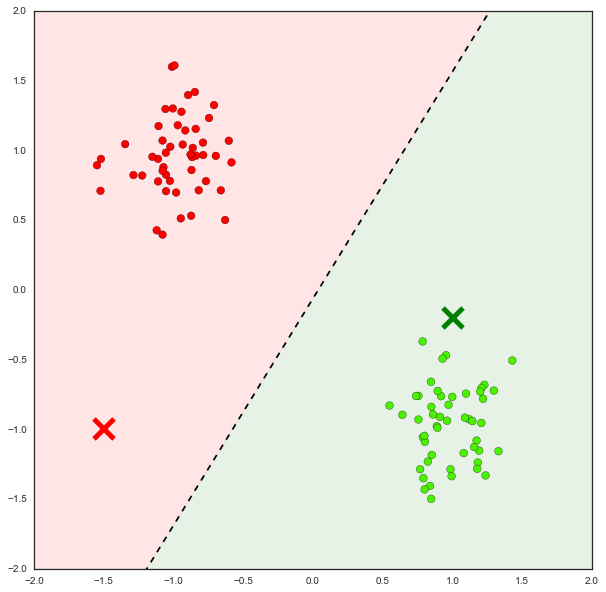

In [295]:
#DATA
plt.scatter(x_val,y_val,c=y_var,cmap='prism',s=60)

#FILL GROUP ZONES
plt.fill_between(x_line,
                 y_line,
                 [2 for x in x_line],
                 alpha = .1,color='r')


plt.fill_between(x_line,
                 y_line,
                 [-2 for x in x_line],
                 alpha = .1,color='g')

#BOUNDARY LINE
coef = model.coef_[0]
slope = -coef[0] / coef[1]
x_line = np.linspace(-3, 3)
y_line = slope * x_line - (model.intercept_[0]) / coef[1]
plt.plot(x_line, y_line, c='k',ls='dashed')

#NEW DATA POINTS
plt.scatter(1,-.2,s=400,marker = 'x',color='green',linewidth = 5)
plt.scatter(-1.5,-1,s=400,marker='x',color='red',linewidth = 5)

#STYLING
plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
plt.xlim(-2, 2)
plt.ylim(-2,2)
plt.show()

---